In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [ ]:
data=pd.read_csv('churn_prediction_simple.csv')

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [ ]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
#checking the DataSet Distribution

In [ ]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

sepratating Dependent and Indipendent variablres


In [ ]:
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [ ]:
from sklearn.linear_model import LogisticRegression  as LR
classifier=LR(class_weight ='balanced')

In [ ]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [ ]:
predicted_values

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.4960255 , 0.5039745 ],
        [0.56710625, 0.43289375],
        [0.57900778, 0.42099222],
        ...,
        [0.70841945, 0.29158055],
        [0.68164346, 0.31835654],
        [0.5323611 , 0.4676389 ]]),
 (4414, 2))

In [ ]:
#accuracy
classifier.score(x_test,y_test)

0.7129587675577708

In [ ]:
#calculating the Presision Score
from sklearn.metrics import precision_score
precision=precision_score(y_test,predicted_values)
precision

0.36357615894039735

In [ ]:
#calculating the recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,predicted_values)
recall

0.6421052631578947

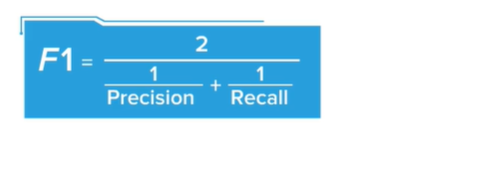

In [ ]:
f1=2/((1/precision)+(1/recall))
f1

0.4642706131078224

In [ ]:
from sklearn.metrics import f1_score
F1=f1_score(y_test,predicted_values)
F1

0.4642706131078224

In [ ]:
# calculating precsion recall f1 score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [ ]:
precision

array([0.8946281 , 0.36357616])

In [ ]:
recall

array([0.72998033, 0.64210526])

In [ ]:
f1

array([0.80396101, 0.46427061])

In [ ]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3559
           1       0.36      0.64      0.46       855

    accuracy                           0.71      4414
   macro avg       0.63      0.69      0.63      4414
weighted avg       0.79      0.71      0.74      4414



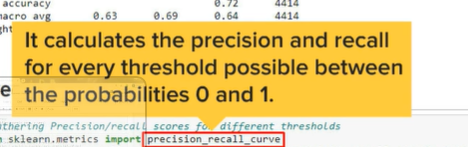

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4415,), (4415,), (4414,))

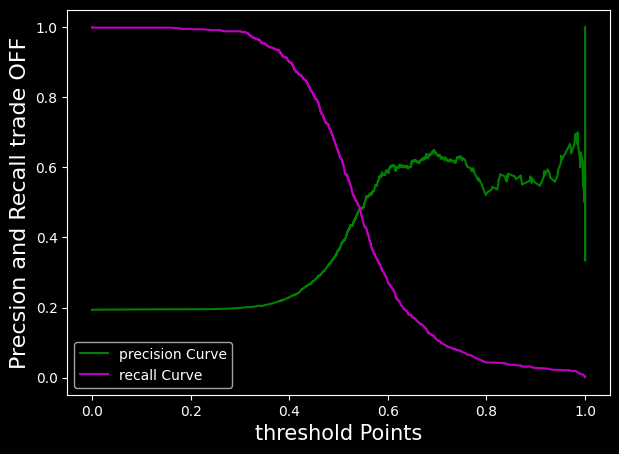

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color="g",label="precision Curve")
plt.plot(threshold_points,recall_points[:-1],color="m",label="recall Curve")
plt.xlabel('threshold Points',fontsize=15)
plt.ylabel("Precsion and Recall trade OFF",fontsize=16)
plt.legend()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])

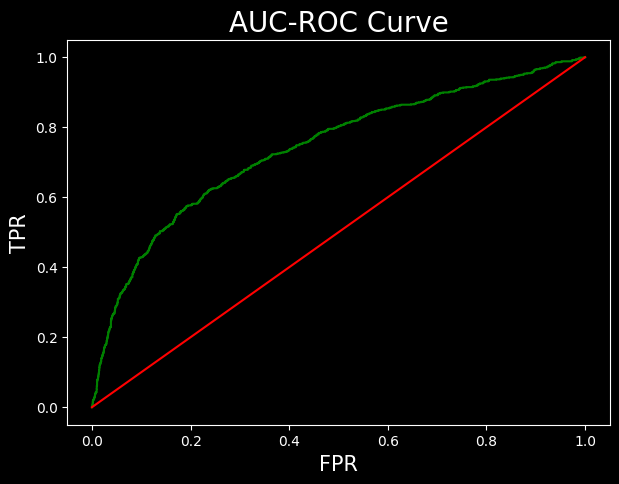

0.7408106291766693

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="g")
plt.plot([0,1],[0,1],label='baseline',color="r")
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC Curve',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

In [ ]:
c=classifier.coef_.reshape(-1)
x=X.columns

coeff_plot=pd.DataFrame({ 'Coefficients':c,
                         'variable':x})

coeff_plot=coeff_plot.sort_values(by='Coefficients')
coeff_plot.head()

,Coefficients,variable
9,-1.716928,current_balance
0,-0.171965,vintage
14,-0.157948,previous_month_credit
8,-0.119262,days_since_last_transaction
10,-0.112077,previous_month_end_balance


Text(0.5, 1.0, 'Coefficient plot')

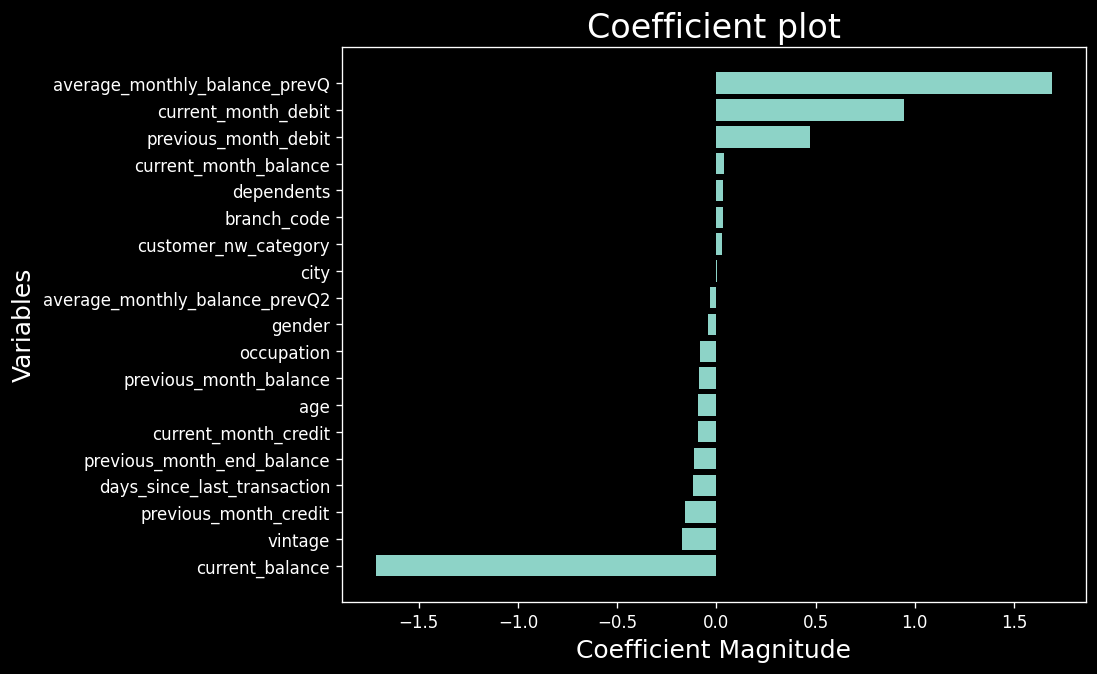

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['Coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)